# CardioGoodFitness

**ABOUT THE DATASET**

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness.

The team decides to investigate whether there are differences across the product lines with respect to customer characteristics.

The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.


**cardiogoodfitness.csv:** The csv contains data related to customers who have purchased different model from Cardio Good Fitness :

* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run
 


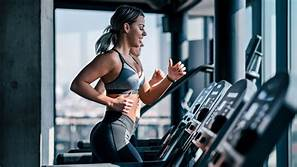

**Objective**

* Come up with a customer profile (characteristics of a customer) of the different products
* Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers

In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Exploring

In [ ]:
#IMPORT NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
df = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns

# Data preprocessing

In [ ]:
df.Product=df["Product"].astype("category")
df.Gender=df["Gender"].astype("category")
df.MaritalStatus=df["MaritalStatus"].astype("category")


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

**Observation:** There are no missing or duplicate values in the dataset

# Data Exploration

In [ ]:
list_col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
#How many models we have?
#what is Martial status of customers?
# how many days people expect to use treadmill?
# what is self rated fitness of customers buying treadmill?
# what is eductaion of customer buying treadmill?
# what is eductaion of customer buying treadmill?
for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))
    

**Observation:**

* Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
* Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
* Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
* Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
* Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
* Average self rated fitness is 3.

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')



**Count based on model**

In [ ]:
df.Product.value_counts()

In [ ]:
df.Gender.value_counts()

In [ ]:
df.MaritalStatus.value_counts()

**Understand data for Product Code TM195**

In [ ]:
df[df['Product'] == 'TM195'].describe()

**Observation**

* 80 customers bought TM195 model
* Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data is right skewed.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week
* Expected Miles to run is on an Average 82.78 miles per week and median is 85.
* Self rated fitness is 3 that is average fitness level
* Average income and median is around $46K.

**Understand data for Product Code TM498**

In [ ]:
df[df['Product'] == 'TM498'].describe().T

**Observations**
 
* There are 60 customers who purchased TM 498 Model
* Average age of customer who purchases TM498 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week
* Expected Miles to run is on an Average 60 miles per week and median is 85.
* Average Income is 48973.
* Median Income is 49459

**Understand data for Product Code TM798**

In [ ]:
df[df['Product'] == 'TM798'].describe()

**Observations**

* Average age of customer who purchases TM798 is 29 , Median is 27 .
* Average Education is 17 and median is 18.
* Expected usage is 4-5 day a week
* Expected Miles to run is on an Average 166 miles per week and median is 160.
* Average Income is 75K and median is 76K

**Average age for each model**

In [ ]:
df.groupby('Product')['Age'].mean()

**Average Income for each model**

In [ ]:
df.groupby('Product')['Income'].mean()

**Average miles per Model**

In [ ]:
df.groupby('Product')['Miles'].mean()

***Correlation between Numerical columns of datase***

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observation**

* Age and Income has some in significant correlation
* Education and Income has very little correlation
* There is some corelation between Usage and Income
* Fitness and miles are corelated
* TM798 model is correlated to Education, Usage,Fitness, Income and Miles.
* Miles and usage are positively correlated

# Data Visualisation

**Analysis Based on Age**

In [ ]:
plt.hist(df.Age, edgecolor = 'white')
plt.title('Histogram view of Age')
plt.show()

In [ ]:
bins = [18,20,22,24,26,28,30,32,34]
plt.hist(df.Age, bins, edgecolor = 'white')
plt.title('Categorical histogram of Age')
plt.show()

**Analysis based on Income**

In [ ]:
sns.distplot(df.Income)
plt.title('Distribution Plot of Income')
plt.show()

In [ ]:
sns.boxplot(df.Income)
plt.title('Box plot of Income')
plt.show()

**Analysis Based on Gender**



In [ ]:
sns.countplot(df.Gender, hue=df.Product)
plt.title('Gender based distribution')
plt.show()

In [ ]:
sns.countplot(df.Product, hue=df.Gender)
plt.title('Gender based distribution')
plt.show()

**Observation**

* TM195 model was equally bought my Male and Female
* Compared to females, male bought TM498 model .
* TM798 model is popular in Males than in female.

In [ ]:
sns.boxplot(df['Gender'],df['Age'])

**Analysis based on Marital Status**

In [ ]:
sns.countplot(df.Product, hue=df.MaritalStatus)
plt.title('Marital Status based distribution')
plt.show()

In [ ]:
sns.countplot(df.MaritalStatus, hue=df.Product)
plt.title('Marital Status based distribution')
plt.show()

**Analysis Based on Usage**

In [ ]:
sns.countplot(df.Usage)
plt.title('Count based on Usage')
plt.show()

In [ ]:
sns.countplot(df.Product, hue=df.Usage)
plt.title('Usage based distribution')
plt.show()

**Analysis Based on Fitness level**

In [ ]:
sns.countplot(df.Fitness)
plt.title('Count based on Self Acclaimed Fitness Level')
plt.show()

In [ ]:
sns.countplot(df.Fitness, hue=df.Product)
plt.title('Fitness Levels based distribution')
plt.show()

**Analysis Based on Education**

In [ ]:
sns.countplot(df.Education)
plt.title('Count based on number of years of Education')
plt.show()

In [ ]:
sns.countplot(df.Education, hue=df.Product)
plt.title('Education based distribution')
plt.show()

**Observation**

Most of the customers have 16 year of education (assuming them to be college graduates or bachelors)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df.Product, hue=df.Education)
plt.title('Education based distribution')
plt.show()

**Analysis Based On Miles planned per week**

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df.Miles)
plt.title('Count based on Miles')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(df.Miles)
plt.title('Boxplot of Miles')
plt.show()

In [ ]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [ ]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],df[list_col[i]])
    

In [ ]:
df[df['Miles']>180]

**Analysis of Miles based on Age**

In [ ]:
sns.jointplot(x='Age',y='Miles',data=df)
plt.show()

**Analysis of Income based on Age**

In [ ]:
sns.jointplot(x='Age',y='Income',data=df, color='red', kind='hex')
plt.show()

**Analysis of Miles based on Income**

In [ ]:
sns.jointplot(x='Income',y='Miles',data=df, color='orange', kind='hex')
plt.show()

**Analysis of Income based on Gender**

In [ ]:
sns.catplot(x='Gender',y='Income',data=df)
plt.show()

**Analysis of Miles based on Gender**

In [ ]:
sns.catplot(x='Gender',y='Miles',data=df, kind='violin')
plt.show()

**Analysis of Usage based on Gender**

In [ ]:
sns.catplot(x='Gender',y='Usage',data=df, kind='bar')
plt.show()

**Analysis of Income based on Marital Status**

In [ ]:
sns.catplot(x='MaritalStatus',y='Income',data=df, kind='box')
plt.show()

**Analysis of Miles based on Marital Status**

In [ ]:
sns.catplot(x='MaritalStatus',y='Miles',data=df, kind='swarm')
plt.show()

**Multivariate Analysis**

In [ ]:
sns.catplot(x='Gender',y='Income', hue='Product',col='MaritalStatus',data=df, kind='bar')
plt.show()

**Pointplot showing sales based on Education & Income**

In [ ]:
sns.pointplot(x=df['Education'],y=df['Income'],hue=df['Product'])
plt.show()

**Observation:-**

* Education and Income are correlated.
* TM798 has higher income and higher education

**Pairplot of all numerical values with classification of Product**

In [ ]:
sns.pairplot(df, hue='Product')
plt.show()

**Observation:-**

We get the same observation as from the correlation plot


**Check for outliers**

In [ ]:
plt.figure(figsize = (20,10))
df.drop('Product', axis = 1).boxplot()
plt.xlabel('Inputs / Features')
plt.title('Boxplot of all Input Features')

There are not much features with outliers so no need to remove them.

# Feature Engineering

**Label Enconding for the Categorical Values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df['MaritalStatus']=label_enc.fit_transform(df['MaritalStatus'])
df.head()

In [ ]:
df['Gender']=[0 if df['Gender'][i]=='Male' else 1 for i in df.index]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df['Product']=label_enc.fit_transform(df['Product'])


**Dividing dataset into train and test set**

In [ ]:
X = df.drop("Product" , axis=1)
y = df["Product"]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# MODEL SELECTION

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression: ', acc_logisreg )

**Linear Discriminent Analysis**

In [ ]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the Linear Discriminant Analysis Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

**Gaussian Naive Bayes**

In [ ]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

**Decision Tree**

In [ ]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

**Random Forest**

In [ ]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier(n_estimators=200,max_depth=4)

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

**K=Nearest-Neighbor**

In [ ]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Here we will check Error for k value in range of 1 to 40
error_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error=np.mean(pred_i == y_test)
    error_rate.append(error)

In [ ]:
# Plot of Error vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.title("Error Rate vs. K-value")
plt.xticks(list(range(1,40)),rotation=90)
plt.grid()

plt.xlabel('K-value')
plt.ylabel('Error_rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  K=Nearest-Neighbor : ', acc_knn )

In [ ]:
# Create a dataframe with all models and score

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest',  
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf,  acc_knn,]})

models.sort_values(by='Score', ascending=False)

Based on the above results we could say that the dataset has better accuracy for Decision Tree.